# Day 26 Choropleth map
### Where are the green areas in Mexico City? Well, this choropleth map answers this question using, using area for living it up with colour.

In [29]:
import geopandas as gpd
import json
import pandas as pd
from shapely.geometry import shape
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
av = pd.read_csv('cdmx_areas_verdes_2017.csv')

In [10]:
def parse_geom(geom_str):
    try:
        return shape(json.loads(geom_str))
    except (TypeError, AttributeError):  # Handle NaN and empty strings
        return None
av["geo_shape"] = av["geo_shape"].apply(parse_geom)

In [13]:
gav = gpd.GeoDataFrame(av, geometry="geo_shape")

<AxesSubplot:title={'center':'Áreas Verdes en la Ciudad de México'}>

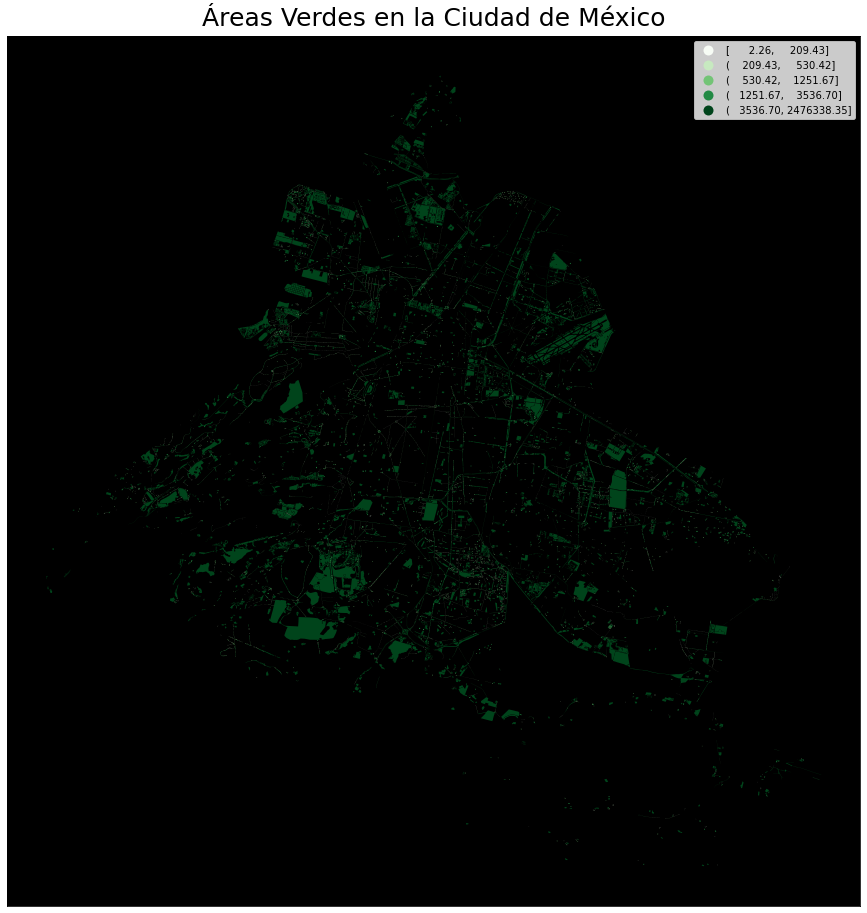

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(20, 16))

ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 

ax.set_title('Áreas Verdes en la Ciudad de México', fontsize=25, pad=10)
ax.set_facecolor('black')

gav.plot(ax = ax, column = "superficie", cmap='Greens', scheme='quantiles', legend=True)

In [31]:
# Save figure
out_file = "AV_CDMX.png"
ax.figure.savefig(out_file, bbox_inches="tight", dpi=600)